In [1]:
import topological_learning as tda
import sklearn_tda as sk_tda

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

Using TensorFlow backend.


In [2]:
import pickle as pkl
embeddedZ = pkl.load(open('example_embedded_time_series.pkl', 'rb'))[:100]
embeddedRegime = pkl.load(open('example_embedded_regime.pkl', 'rb'))
embeddedZ.shape

(100, 96, 10)

In [3]:
%%time
persistenceDiagram = tda.VietorisRipsDiagram(dataType='points', maxEdgeLength=100, homologyDimensions=[1, 2], 
                                             n_jobs=1)
persistenceDiagram.fit([embeddedZ])
diagrams_all = persistenceDiagram.transform([embeddedZ])

CPU times: user 13.6 s, sys: 19 ms, total: 13.7 s
Wall time: 13.7 s


In [8]:
a = [[1, 2], [3, 4]]
np.pad(a, ((0,0), (2, 3)), 'constant')

array([[0, 0, 1, 2, 0, 0, 0],
       [0, 0, 3, 4, 0, 0, 0]])

CPU times: user 1.92 s, sys: 39 ms, total: 1.96 s
Wall time: 1.96 s


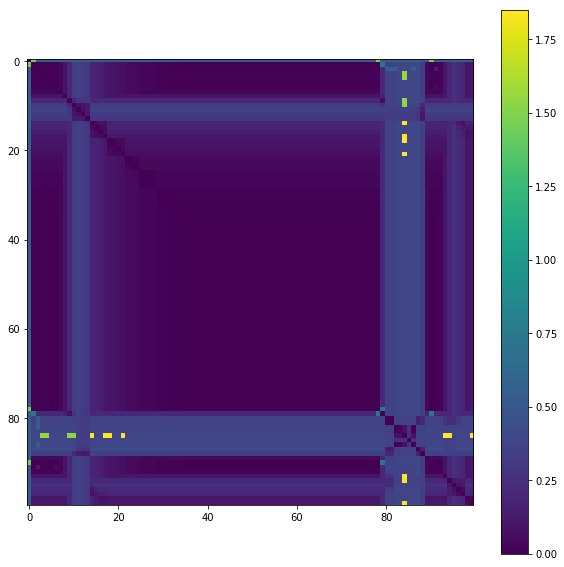

In [4]:
%%time
diagramDistance = tda.DiagramDistance(metric_kwargs={'metric':'bottleneck'}, 
                                      separateDimensions=True, n_jobs=1)
diagramDistance.fit(diagrams_all)
distanceMatrix_all = diagramDistance.transform(diagrams_all)
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_all[0])
plt.colorbar()

CPU times: user 1.85 s, sys: 124 ms, total: 1.97 s
Wall time: 1.82 s


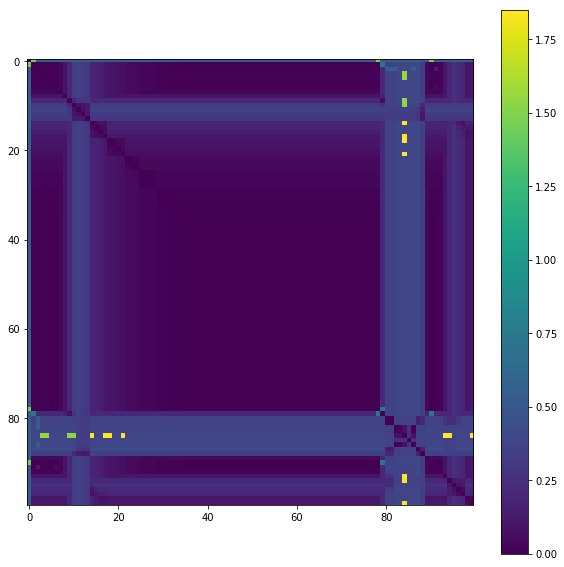

In [5]:
%%time
diagramDistance = tda.DiagramDistance(metric_kwargs={'metric':'bottleneck'}, 
                                      separateDimensions=True, order=np.inf, n_jobs=1)
diagramDistance.fit(diagrams_all)
distanceMatrix_all = diagramDistance.transform(diagrams_all)
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_all[0])
plt.colorbar()

CPU times: user 2.53 s, sys: 123 ms, total: 2.65 s
Wall time: 2.49 s


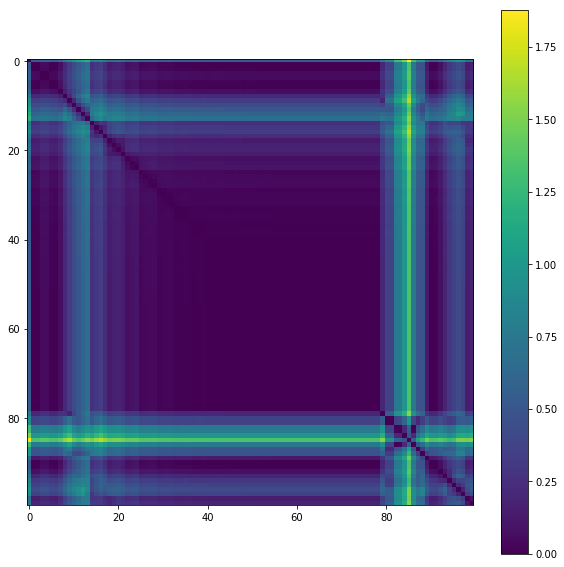

In [6]:
%%time
diagramDistance = tda.DiagramDistance(metric_kwargs={'metric':'wasserstein', 'order':1}, 
                                      separateDimensions=False, n_jobs=1)
diagramDistance.fit(diagrams_all)
distanceMatrix_all = diagramDistance.transform(diagrams_all)
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_all[0])
plt.colorbar()

CPU times: user 7.02 s, sys: 85.9 ms, total: 7.11 s
Wall time: 7.14 s


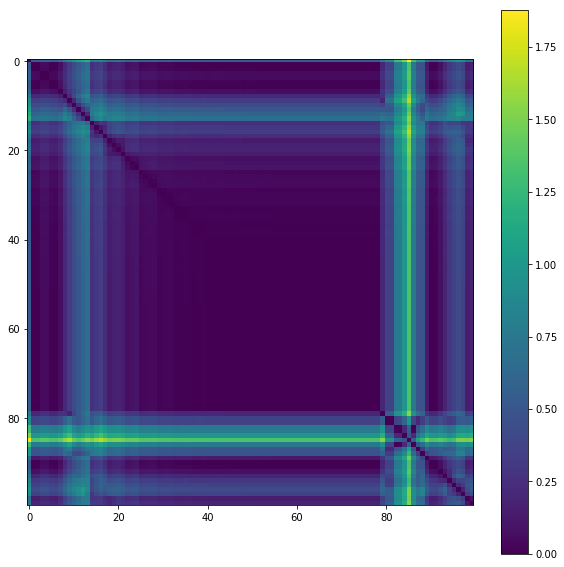

In [10]:
%%time
diagramDistance = tda.DiagramDistance(metric_kwargs={'metric':'wasserstein', 'order':1}, 
                                      separateDimensions=True, order=1, n_jobs=1)
diagramDistance.fit(diagrams_all)
distanceMatrix_all = diagramDistance.transform(diagrams_all)
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_all[0])
plt.colorbar()

CPU times: user 4.31 s, sys: 8.44 ms, total: 4.32 s
Wall time: 4.32 s


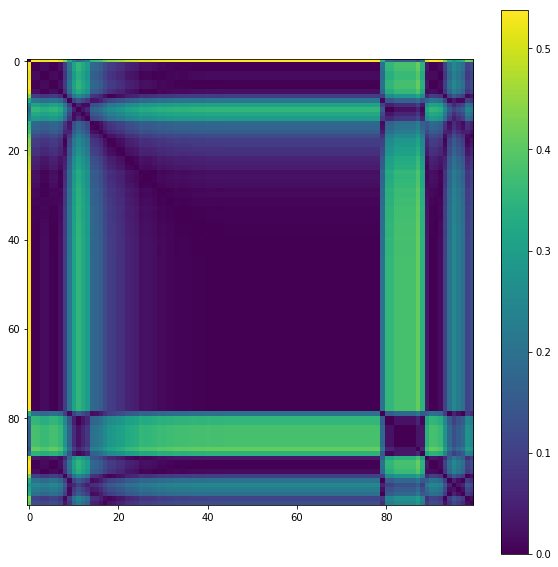

In [5]:
%%time
diagramDistance = tda.DiagramDistance(metric_kwargs={'metric':'landscape', 'order':2, 'n_layers':1, 'n_samples':1000},
                                      separateDimensions=False, n_jobs=1)
diagramDistance.fit(diagrams_all)
distanceMatrix_all = diagramDistance.transform(diagrams_all)
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_all[0])
plt.colorbar()

CPU times: user 5.23 s, sys: 30.7 ms, total: 5.26 s
Wall time: 5.26 s


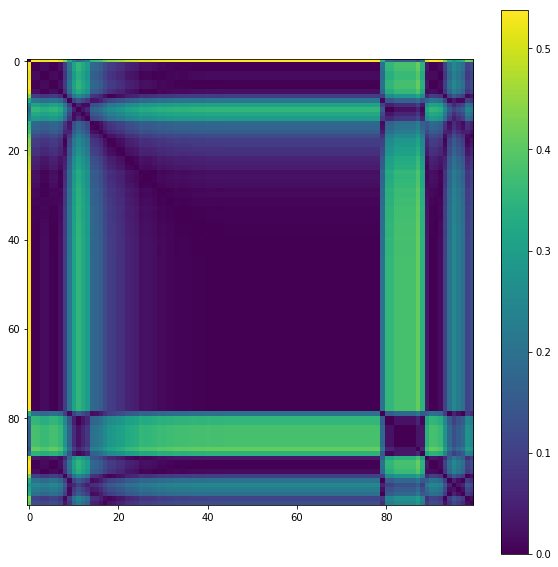

In [4]:
%%time
diagramDistance = tda.DiagramDistance(metric_kwargs={'metric':'landscape', 'order':2, 'n_layers':1, 'n_samples':1000},
                                      separateDimensions=True, order=2, n_jobs=1)
diagramDistance.fit(diagrams_all)
distanceMatrix_all = diagramDistance.transform(diagrams_all)
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_all[0])
plt.colorbar()

CPU times: user 10min 42s, sys: 13.4 s, total: 10min 55s
Wall time: 10min 42s


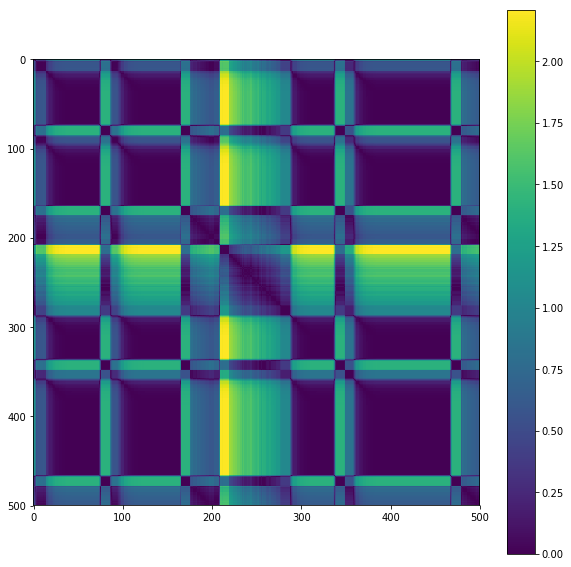

In [8]:
%%time
diagramDistance = tda.DiagramDistance(metric_kwargs={'metric':'landscape', 'order':2, 'n_layers':3, 'n_samples':1000},
                                                     separateDimensions=False, n_jobs=1)
diagramDistance.fit(diagrams_all)
distanceMatrix_all = diagramDistance.transform(diagrams_all)
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_all[0])
plt.colorbar()

CPU times: user 28min 48s, sys: 23.4 s, total: 29min 12s
Wall time: 28min 49s


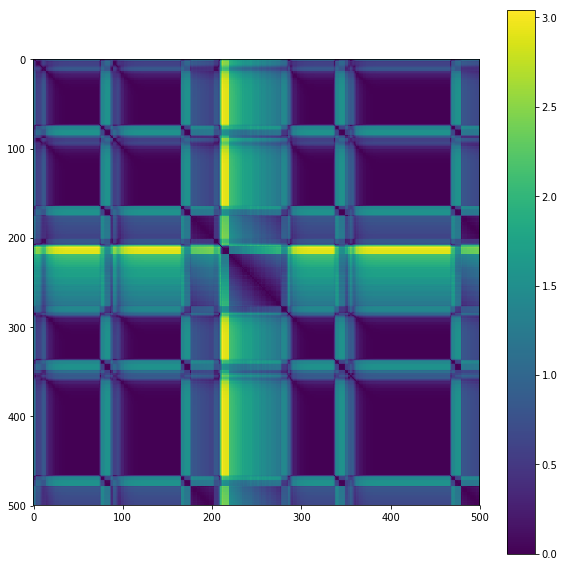

In [9]:
%%time
diagramDistance = tda.DiagramDistance(metric_kwargs={'metric':'landscape', 'order':2, 'n_layers':3, 'n_samples':1000},
                                                     separateDimensions=True, order=2, n_jobs=1)
diagramDistance.fit(diagrams_all)
distanceMatrix_all = diagramDistance.transform(diagrams_all)
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_all[0])
plt.colorbar()

CPU times: user 9min 35s, sys: 9.57 s, total: 9min 45s
Wall time: 9min 34s


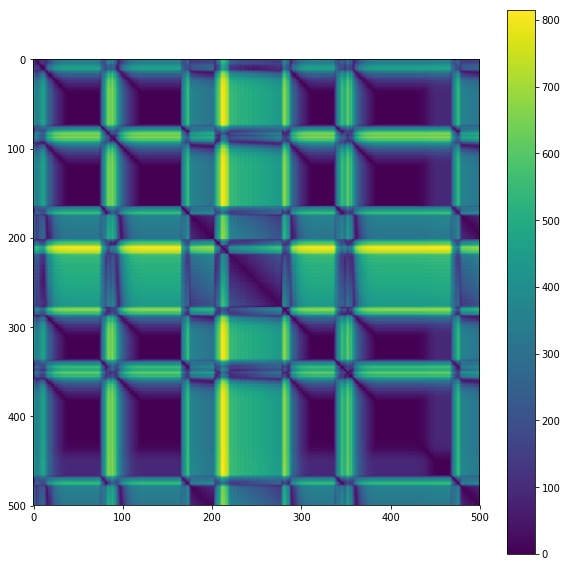

In [10]:
%%time
diagramDistance = tda.DiagramDistance(metric_kwargs={'metric':'betti', 'n_samples':1000}, 
                                      separateDimensions=False, order=2, n_jobs=1)
diagramDistance.fit(diagrams_all)
distanceMatrix_all = diagramDistance.transform(diagrams_all)
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_all[0])
plt.colorbar()

CPU times: user 27min 57s, sys: 22.5 s, total: 28min 19s
Wall time: 27min 56s


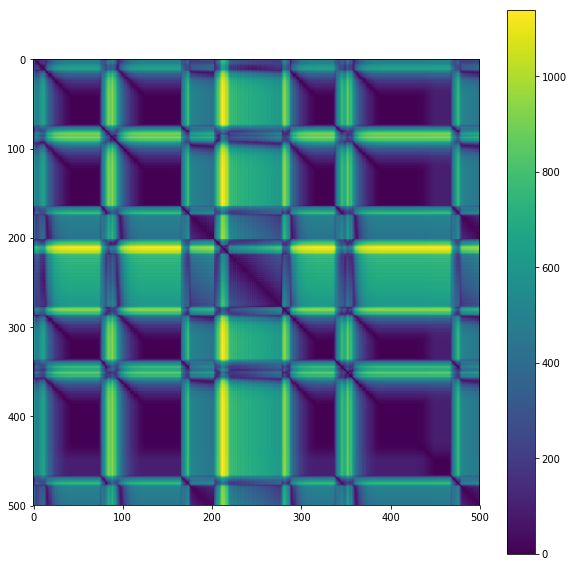

In [11]:
%%time
diagramDistance = tda.DiagramDistance(metric_kwargs={'metric':'betti', 'n_samples':1000}, 
                                      separateDimensions=True, order=2, n_jobs=1)
diagramDistance.fit(diagrams_all)
distanceMatrix_all = diagramDistance.transform(diagrams_all)
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_all[0])
plt.colorbar()

In [28]:
import numpy as np

a = np.zeros((10,0))
b = a[2, :]
print(b)

[]


In [ ]:
%%time
diagramDistance.fit(diagrams_all)
distanceMatrix_all = diagramDistance.transform(diagrams_all)

In [ ]:
import pickle as pkl
pkl.dump(distanceMatrix_train, open('distanceMatrix_train.pkl', 'wb'))
pkl.dump(distanceMatrix_test, open('distanceMatrix_test.pkl', 'wb'))
pkl.dump(distanceMatrix_all, open('distanceMatrix_all.pkl', 'wb'))

In [ ]:
import pickle as pkl
distanceMatrix_train = pkl.load(open('distanceMatrix_train.pkl', 'rb'))
distanceMatrix_test = pkl.load(open('distanceMatrix_test.pkl', 'rb'))
distanceMatrix_all = pkl.load(open('distanceMatrix_all.pkl', 'rb'))

In [ ]:
%%time
mds = tda.MDS(n_components=3, dissimilarity='precomputed', n_jobs=1)
mds.fit(distanceMatrix_train)
embedded_train = mds.transform(distanceMatrix_train)
embedded_test = mds.transform(distanceMatrix_test)

In [ ]:
%%time
mds.fit(distanceMatrix_all)
embedded_all = mds.transform(distanceMatrix_all)

In [ ]:
print(distanceMatrix_train[0].shape, distanceMatrix_test[0].shape, distanceMatrix_all[0].shape)
print(embedded_train[0].shape, embedded_test[0].shape, embedded_all[0].shape)

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_all[0])
plt.colorbar()

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
distance_all = euclidean_distances(embedded_all[0])

figure = plt.figure(figsize=(10,10))
plt.imshow(distance_all)
plt.colorbar()

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
distance_all = euclidean_distances(embedded_test[0])

figure = plt.figure(figsize=(10,10))
plt.imshow(distance_all)
plt.colorbar()

In [ ]:
diagramDistance = tda.DiagramDistance(n_jobs=1)
diagramDistance.fit(diagrams[0])
distanceMatrix_all = diagramDistance.transform(diagrams[0])

In [ ]:
print(distanceMatrix_all.shape[0]**2)
np.sum(distanceMatrix_all == distanceMatrix_all.T)

In [ ]:
mds = tda.MDS(n_components=3, dissimilarity='precomputed', n_jobs=1)

In [ ]:
%%time

mds.fit(distanceMatrix_48)
embedded_all = mds.transform(distanceMatrix_48)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
distance_sep = euclidean_distances(embedded_test)

figure = plt.figure(figsize=(10,10))
plt.imshow(distance_sep)
plt.colorbar()

In [ ]:
from sklearn_tda.hera_bottleneck import bottleneck

errorList = [0, 0.001, 0.01, 0.1]

for error in errorList:
    metric_kwargs = {'delta': error}
    diagramDistance_48 = tda.DiagramDistance(metric = bottleneck, **metric_kwargs, n_jobs = 1)
    diagramDistance_48.fit(diagrams[0])
    print(error)
    %timeit distanceMatrix_48 = diagramDistance_48.transform(diagrams[0])

In [ ]:
from sklearn_tda.hera_wasserstein import wasserstein

pList = [1, 2, 3, 4]
errorList = [0.0001, 0.001, 0.01, 0.1]

for p in pList:
    print(p)
    for error in errorList:
        metric_kwargs = {'delta': error, 'p': p}
        diagramDistance_48 = tda.DiagramDistance(metric = wasserstein, **metric_kwargs, n_jobs = 1)
        diagramDistance_48.fit(diagrams[0])
        print('  ', error)
        %timeit distanceMatrix_48 = diagramDistance_48.transform(diagrams[0])

In [ ]:
persistenceDiagram = tda.VietorisRipsDiagram(dataType = 'points', maxEdgeLength = 100, maxHomologyDimension = 2, 
                                             n_jobs = 1)
persistenceDiagram.fit([embeddedZ])
%timeit -n 1 -r 1 diagrams = persistenceDiagram.transform([embeddedZ])

In [ ]:
from sklearn_tda.hera_bottleneck import bottleneck
diagramDistance_B = tda.DiagramDistance(metric = bottleneck, n_jobs = 1, delta = 0.001)
diagramDistance_B.fit(diagrams[0])
distanceMatrix_B = diagramDistance_B.transform(diagrams[0])

In [ ]:
from sklearn_tda.hera_wasserstein import wasserstein
diagramDistance_W1 = tda.DiagramDistance(metric = wasserstein, n_jobs = 1, p = 1, delta = 0.001)
diagramDistance_W1.fit(diagrams[0])
distanceMatrix_W1 = diagramDistance_W1.transform(diagrams[0])

diagramDistance_W2 = tda.DiagramDistance(metric = wasserstein, n_jobs = 1, p = 2, delta = 0.001)
diagramDistance_W2.fit(diagrams[0])
distanceMatrix_W2 = diagramDistance_W2.transform(diagrams[0])

diagramDistance_W3 = tda.DiagramDistance(metric = wasserstein, n_jobs = 1, p = 3, delta = 0.001)
diagramDistance_W3.fit(diagrams[0])
distanceMatrix_W3 = diagramDistance_W3.transform(diagrams[0])

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_B)
plt.colorbar()

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_W1)
plt.colorbar()

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_W2)
plt.colorbar()

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.imshow(distanceMatrix_W3)
plt.colorbar()

In [ ]:
labeller = tda.LorenzLabeller()
labeller.fit(embeddedRegime)

In [ ]:
labels = np.mean(labeller.transform(embeddedRegime[:500]), axis=1)

In [ ]:
diagrams_H0 = [diagram[0] for diagram in diagrams]
diagrams_H1 = [diagram[1] for diagram in diagrams]

In [ ]:
from numpy import inf
for diagram in diagrams_H0:
    diagram[diagram == inf] = 100
for diagram in diagrams_H1:
    diagram[diagram == inf] = 100
print(diagrams[0])

In [ ]:
bettiCurveTransform = sk_tda.BettiCurve(resolution=1000)

In [ ]:
bc_H0 = np.array(bettiCurveTransform.fit_transform(diagrams_H0)).T
print(bc_H0.shape)

In [ ]:
figure = plt.figure(figsize=(16,6))
plt.plot(bc_H0)
plt.show()

In [ ]:
title = '0-Betti Landscape'
z = bc_H0[:100]
surfacecolor = np.empty(z.shape)

print(bc_H0.shape)

for i in range(z.shape[0]):
    surfacecolor[i, :] = labels.reshape((1, 1))

print(z.shape, surfacecolor.shape)
trace = go.Surface(z = z, surfacecolor=surfacecolor, opacity=0.7)

data = [trace]
layout = go.Layout(margin=dict(l = 0, r = 0, b = 0, t = 0))

figure = go.Figure(data=data, layout=layout)
iplot(figure, filename='3d_0-Betti_Landscape')

In [ ]:
bc_H1 = np.array(bettiCurveTransform.fit_transform(diagrams_H1)).T

figure = plt.figure(figsize=(16,6))
plt.plot(bc_H1)
plt.show()

In [ ]:
title = '1-Betti Landscape'

z = bc_H1[:200]
surfacecolor = np.empty(z.shape)
for i in range(z.shape[0]):
    surfacecolor[i, :] = labels.reshape((1, 1))

print(z.shape, surfacecolor.shape)
trace = go.Surface(z = z, surfacecolor=surfacecolor, opacity=0.7)

data = [trace]
layout = go.Layout(margin=dict(l = 0, r = 0, b = 0, t = 0))

figure = go.Figure(data=data, layout=layout)
iplot(figure, filename='3d_1-Betti_Landscape')

In [ ]:
diagrams_H2 = [diagram[2] for diagram in diagrams]
bc_H2 = np.array(bettiCurveTransform.fit_transform(diagrams_H2)).T

figure = plt.figure(figsize=(16,6))
plt.plot(bc_H2)
plt.show()

In [ ]:
title = '2-Betti Landscape'

z = bc_H2[:400]
surfacecolor = np.empty(z.shape)
for i in range(z.shape[0]):
    surfacecolor[i, :] = labels.reshape((1, 1))

print(z.shape, surfacecolor.shape)
trace = go.Surface(z = z, surfacecolor=surfacecolor, opacity=0.7)

data = [trace]
layout = go.Layout(margin=dict(l = 0, r = 0, b = 0, t = 0))

figure = go.Figure(data=data, layout=layout)
iplot(figure, filename='3d_2-Betti_Landscape')

In [ ]:
diagrams_H3 = [diagram[3] for diagram in diagrams]
bc_H3 = np.array(bettiCurveTransform.fit_transform(diagrams_H3)).T

figure = plt.figure(figsize=(16,6))
plt.plot(bc_H3)
plt.show()

In [ ]:
title = '3-Betti Landscape'

z = bc_H3[:400]
surfacecolor = np.empty(z.shape)
for i in range(z.shape[0]):
    surfacecolor[i, :] = labels.reshape((1, 1))

print(z.shape, surfacecolor.shape)
trace = go.Surface(z = z, surfacecolor=surfacecolor, opacity=0.7)

data = [trace]
layout = go.Layout(margin=dict(l = 0, r = 0, b = 0, t = 0))

figure = go.Figure(data=data, layout=layout)
iplot(figure, filename='3d_3-Betti_Landscape')

In [ ]:
import pickle as pkl
diagrams = pkl.load(open('example_filtered_time_series.pkl', 'rb'))

In [ ]:
# import pickle as pkl
pkl.dump(diagrams, open('example_filtered_time_series.pkl', 'wb'))